## Final Project Submission

Please fill out:
* Student name:  NDUTA TABITHA ELSIE 
* Student pace:  Part time
* Scheduled project review date/time: 
* Instructor name: Samuel Jane 
* Blog post URL:https://medium.com/@elsie-n/microsoft-movies-exploratory-data-analysis-visualization-using-python-4adf9e0429a8


In [1]:
# Importing the necessary libraries and installing wordcloud
!pip install wordcloud

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud

from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
#Loading the basics csv
basics = pd.read_csv('title.basics.csv' , index_col = 0)

In [3]:
#Loading the ratings csv
ratings = pd.read_csv('title.ratings.csv' , index_col = 0)

In [4]:
#Loading the gross csv
gross = pd.read_csv('bom.movie_gross.csv', index_col = 0)

#### *Inspecting basics*

In [5]:
#To display the first few rows
basics.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [6]:
#To display the last few rows
basics.tail()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [7]:
#To get the information summary on the table
# we see some of the columns have null entries, data types of the columns.

basics.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [8]:
#Check the number of rows and columns
#There are 5 columns and 146144 rows
basics.shape

(146144, 5)

In [9]:
#Gettings a summary of the numeric columns
basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [10]:
#To check null values
basics.isna().sum()

primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [11]:
# To check Duplicates
basics.duplicated().sum()

122

In [12]:
# sorting the data in ascending order inorder to test for outliers.
basics_startyear = basics.sort_values(by ='start_year',ascending = True)

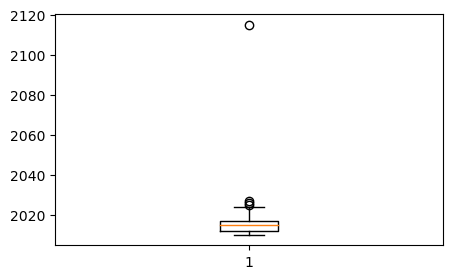

In [13]:
# checking for outliers using boxplot
fig = plt.figure(figsize =(5, 3))
plt.boxplot(basics_startyear['start_year'])

plt.show()
# This indicates there is an outlier in the dataset start year

In [14]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
basics_cpyy = basics.copy()

#### *Inspecting ratings*

In [15]:
# To dsiplay first few rows 
ratings.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [16]:
# To display last few rows
ratings.tail()

,averagerating,numvotes
tconst,,
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14
tt9886934,7.0,5
tt9894098,6.3,128


In [17]:
# Getting a summary of the table
ratings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


In [18]:
#Check the number of rows and columns
#There are 2 columns  and 73856 rows
ratings.shape

(73856, 2)

In [19]:
#Gettings a summary of the numeric columns
ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [20]:
# To check null values
ratings.isna().sum()

averagerating    0
numvotes         0
dtype: int64

In [21]:
# To check duplicated values
# Values related to ratings and num of votes can be the same 
ratings.duplicated().sum()

45074

In [22]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
ratings_cpyy = ratings.copy()

#### *Inspecting gross*

In [23]:
#To display the first few rows
gross.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [24]:
#To display the last few rows
gross.tail()

,studio,domestic_gross,foreign_gross,year
title,,,,
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018
The Swan,Synergetic,2400.0,NaN,2018
An Actor Prepares,Grav.,1700.0,NaN,2018


In [25]:
#Getting a summary of the table
#Table has 4 columns,3387 rows , some of the rows have null values
gross.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [26]:
# To check number of rows and columns
# the table has 4 columns and 3387 rows
gross.shape

(3387, 4)

In [27]:
#Getting a summary of the numeric columns
gross.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [28]:
#To check null values
gross.isna().sum()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [29]:
#To check duplicates 
gross.duplicated().sum()

11

In [30]:
# Making a copy of the dataframe to use it avoid making permanent changes to the original
gross_cpyy = gross.copy()

### *Data Issues*

1.Datasets in Separate dataframes

2.Missings Data 

3.Duplicated Data

4.Converting start_year and year to datetime(yy-mm-dd) 

5.Outliers

6.Genre given as a list(cases of multiple genres) in one column.


**Combining the datasets before addressing the quality issues** 

In [31]:
# joining basics_cpyy and ratings_cpyy so that it retains only the movies/series that have a rating and votecount
new_df = basics_cpyy.merge(ratings_cpyy, on='tconst',how='right')

new_df.head()

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt10356526,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance,8.3,31
tt10384606,Borderless,Borderless,2019,87.0,Documentary,8.9,559
tt1042974,Just Inès,Just Inès,2010,90.0,Drama,6.4,20
tt1043726,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352
tt1060240,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller",6.5,21


In [32]:
#To get a summary of the combined datasets
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   primary_title    73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [33]:
#Notice the columns have been combined(basics had 5 ratings had 2) and number of rows from the ratings have remained constant
new_df.shape

(73856, 7)

In [34]:
#Renaming the column primary_title to title
new_df.rename(columns = {'primary_title':'title'}, inplace = True)

In [35]:
#confirming the renaming 
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            73856 non-null  object 
 1   original_title   73856 non-null  object 
 2   start_year       73856 non-null  int64  
 3   runtime_minutes  66236 non-null  float64
 4   genres           73052 non-null  object 
 5   averagerating    73856 non-null  float64
 6   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 4.5+ MB


In [36]:
# Joining the combined dataset and the gross_cpyy
combined_df = new_df.merge(gross_cpyy, on='title')

# To display a few of the data at the top of the table
combined_df.head()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,LG/S,18800000.0,42400000,2014
1,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5.1,8296,FoxS,21600000.0,887000,2013
2,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",7.0,5494,Shout!,NaN,3400000,2014
3,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",7.6,326657,Sony,75600000.0,34600000,2011
4,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",6.5,87288,WB,32700000.0,72500000,2010


In [37]:
# Working with the combined data onwards

#To display the last few rows from the table
combined_df.tail()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
3022,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",6.3,4185,Magn.,5200.0,NaN,2015
3023,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",6.7,28167,Magn.,177000.0,NaN,2016
3024,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,7.4,4977,Cohen,260000.0,NaN,2015
3025,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",7.0,18768,Focus,6800000.0,5000000,2018
3026,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",7.7,11168,Cohen,1000000.0,NaN,2018


In [38]:
#To check the summary of the table
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3027 non-null   object 
 1   original_title   3027 non-null   object 
 2   start_year       3027 non-null   int64  
 3   runtime_minutes  2980 non-null   float64
 4   genres           3020 non-null   object 
 5   averagerating    3027 non-null   float64
 6   numvotes         3027 non-null   int64  
 7   studio           3024 non-null   object 
 8   domestic_gross   3005 non-null   float64
 9   foreign_gross    1832 non-null   object 
 10  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 283.8+ KB


In [39]:
#To check the number of rows and columns
combined_df.shape

(3027, 11)

In [40]:
# To check the summary of the numeric columns
combined_df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3027.000000,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,2013.783284,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,2.466955,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


**Duplicated Data**

In [41]:
#Checking duplicated data
# no duplicates,combining the datasets automatically eliminated the duplicated data from the individual dataset inspection.
combined_df.duplicated().sum()

0

**Missing Data**

In [42]:
# Defining a function to return percentage of missing values
def missing_values(combined_df):
    #Identify the total missing values per column and sort
    miss = combined_df.isna().sum().sort_values(ascending = False)
    
    #Calculating percentage of missing values and sort
    percent_miss = (combined_df.isna().sum()/len(combined_df)).sort_values(ascending = False)
    
    #Store in dataframe
    missing = pd.DataFrame({'Missing values':miss, 'Percentage %':percent_miss*100})
    
    return missing

missing_data = missing_values(combined_df)
missing_data


,Missing values,Percentage %
foreign_gross,1195,39.478031
runtime_minutes,47,1.552692
domestic_gross,22,0.726792
genres,7,0.231252
studio,3,0.099108
title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
averagerating,0,0.000000
numvotes,0,0.000000


In [43]:
#Drooping the column foreign_gross 39% missing values with no criteria of filling dropping the rows will reduce my dataset
combined_df = combined_df.drop('foreign_gross', axis = 'columns')

In [44]:
#confirming the column drop
combined_df.columns

Index(['title', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'studio', 'domestic_gross', 'year'],
      dtype='object')

In [45]:
# Cannot fill a genre or studio or domestic_gross so drop missing values 
combined_df = combined_df.dropna(subset=['genres','studio','domestic_gross'])

In [46]:
#confirming drop of missing values
missing_data = missing_values(combined_df)
missing_data

,Missing values,Percentage %
runtime_minutes,45,1.501502
title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
genres,0,0.000000
averagerating,0,0.000000
numvotes,0,0.000000
studio,0,0.000000
domestic_gross,0,0.000000
year,0,0.000000


<AxesSubplot:ylabel='Density'>

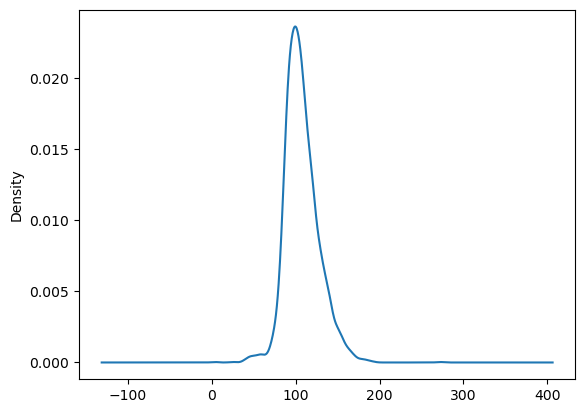

In [47]:
#Checking the distribution of runtime 
combined_df['runtime_minutes'].plot(kind='kde')

#Data seems to be more peaked in the middle hnece can fill the missing data using the mean since its mean lies
#between 50% quarntile and 75% quantile

In [48]:
runtime_mean = combined_df['runtime_minutes'].mean()
runtime_mean

107.3058943089431

In [49]:
#Filling the missing value in with the mean 
combined_df['runtime_minutes'].fillna(value=runtime_mean, inplace=True)
print('Updated Dataframe:')
print(combined_df)

Updated Dataframe:
                                     title  \
0                   The Legend of Hercules   
1                            Baggage Claim   
3                                Moneyball   
4                                Hereafter   
5     Mission: Impossible - Ghost Protocol   
...                                    ...   
3022                        The Dead Lands   
3023                              The Wave   
3024                    Hitchcock/Truffaut   
3025                            Boy Erased   
3026                            The Insult   

                            original_title  start_year  runtime_minutes  \
0                   The Legend of Hercules        2014             99.0   
1                            Baggage Claim        2013             96.0   
3                                Moneyball        2011            133.0   
4                                Hereafter        2010            129.0   
5     Mission: Impossible - Ghost Protocol        201

In [50]:
# Confirming fill of misisng values
missing_data = missing_values(combined_df)
missing_data

,Missing values,Percentage %
title,0,0.0
original_title,0,0.0
start_year,0,0.0
runtime_minutes,0,0.0
genres,0,0.0
averagerating,0,0.0
numvotes,0,0.0
studio,0,0.0
domestic_gross,0,0.0
year,0,0.0


In [51]:
combined_df.head()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,LG/S,18800000.0,2014
1,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5.1,8296,FoxS,21600000.0,2013
3,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",7.6,326657,Sony,75600000.0,2011
4,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",6.5,87288,WB,32700000.0,2010
5,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",7.4,428142,Par.,209400000.0,2011


**Column Renaming**

In [52]:
# Checking columns
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3026
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2997 non-null   object 
 1   original_title   2997 non-null   object 
 2   start_year       2997 non-null   int64  
 3   runtime_minutes  2997 non-null   float64
 4   genres           2997 non-null   object 
 5   averagerating    2997 non-null   float64
 6   numvotes         2997 non-null   int64  
 7   studio           2997 non-null   object 
 8   domestic_gross   2997 non-null   float64
 9   year             2997 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 257.6+ KB


In [53]:
# Confirming if start_year & year are similar
combined_df['start_year'] == combined_df['year']

0        True
1        True
3        True
4        True
5        True
        ...  
3022    False
3023    False
3024     True
3025     True
3026    False
Length: 2997, dtype: bool

In [54]:
#Confirming if one is at a later time
combined_df['start_year'] <= combined_df['year']

0       True
1       True
3       True
4       True
5       True
        ... 
3022    True
3023    True
3024    True
3025    True
3026    True
Length: 2997, dtype: bool

In [55]:
# renaming year column to final year to indicate year show/movie/series is finally aired
combined_df.rename(columns = {'year':'final_year'}, inplace = True)

In [56]:
#Confirming change of column name
combined_df.columns

Index(['title', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes', 'studio', 'domestic_gross', 'final_year'],
      dtype='object')

In [57]:
combined_df.head()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,final_year
0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,LG/S,18800000.0,2014
1,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5.1,8296,FoxS,21600000.0,2013
3,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",7.6,326657,Sony,75600000.0,2011
4,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",6.5,87288,WB,32700000.0,2010
5,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",7.4,428142,Par.,209400000.0,2011


In [58]:
#Start_year is more than final year hence the rename does not nake sense ,solution renaming back final_year to year
combined_df.tail()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,final_year
3022,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",6.3,4185,Magn.,5200.0,2015
3023,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",6.7,28167,Magn.,177000.0,2016
3024,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,7.4,4977,Cohen,260000.0,2015
3025,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",7.0,18768,Focus,6800000.0,2018
3026,The Insult,L'insulte,2017,113.0,"Crime,Drama,Thriller",7.7,11168,Cohen,1000000.0,2018


In [59]:
# renaming final_year column back to year
combined_df.rename(columns = {'final_year':'year'}, inplace = True)

In [60]:
#confirming
combined_df.head()

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year
0,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",4.2,50352,LG/S,18800000.0,2014
1,Baggage Claim,Baggage Claim,2013,96.0,Comedy,5.1,8296,FoxS,21600000.0,2013
3,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",7.6,326657,Sony,75600000.0,2011
4,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",6.5,87288,WB,32700000.0,2010
5,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011,132.0,"Action,Adventure,Thriller",7.4,428142,Par.,209400000.0,2011


**Data type conversion**

In [61]:
# Confirming data types of columns
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3026
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2997 non-null   object 
 1   original_title   2997 non-null   object 
 2   start_year       2997 non-null   int64  
 3   runtime_minutes  2997 non-null   float64
 4   genres           2997 non-null   object 
 5   averagerating    2997 non-null   float64
 6   numvotes         2997 non-null   int64  
 7   studio           2997 non-null   object 
 8   domestic_gross   2997 non-null   float64
 9   year             2997 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 257.6+ KB


In [62]:
# start_year and final_year displayed as int instead of datatime
combined_df.start_year = pd.to_datetime(combined_df.start_year, format='%Y')

In [63]:
# start_year and year displayed as int instead of datatime
combined_df.year = pd.to_datetime(combined_df.year, format='%Y')

In [64]:
#confirming 
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2997 entries, 0 to 3026
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            2997 non-null   object        
 1   original_title   2997 non-null   object        
 2   start_year       2997 non-null   datetime64[ns]
 3   runtime_minutes  2997 non-null   float64       
 4   genres           2997 non-null   object        
 5   averagerating    2997 non-null   float64       
 6   numvotes         2997 non-null   int64         
 7   studio           2997 non-null   object        
 8   domestic_gross   2997 non-null   float64       
 9   year             2997 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 257.6+ KB


**Outliers**

In [65]:
# Retriving the summary on the numeric columns
combined_df.describe()

,runtime_minutes,averagerating,numvotes,domestic_gross
count,2997.000000,2997.000000,2.997000e+03,2.997000e+03
mean,107.305894,6.460961,6.224251e+04,3.060446e+07
std,19.892240,1.009615,1.260159e+05,6.677623e+07
min,3.000000,1.600000,5.000000e+00,1.000000e+02
25%,94.000000,5.900000,2.221000e+03,1.380000e+05
50%,105.000000,6.600000,1.338600e+04,2.000000e+06
75%,118.000000,7.200000,6.530400e+04,3.240000e+07
max,272.000000,9.200000,1.841066e+06,7.001000e+08


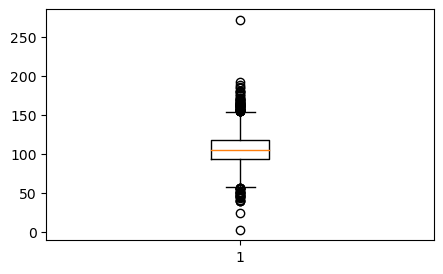

'\n\nFrom the box plot the median is a bit above 100minutes the outliers should be retained since a movie could\nhave different runtimes depending on the producers storyline\n\n'

In [66]:
fig = plt.figure(figsize =(5, 3))
 
# Creating plot
plt.boxplot(combined_df.runtime_minutes)
 
# show plot
plt.show()

"""

From the box plot the median is a bit above 100minutes the outliers should be retained since a movie could
have different runtimes depending on the producers storyline

"""

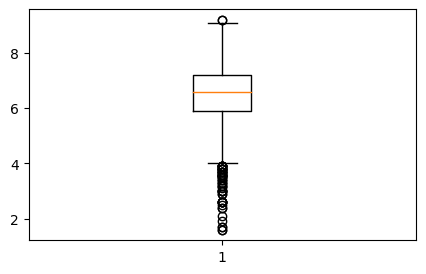

'\n\nFrom the box plot the median is a bit around a  the outliers should be retained since ratings\nentially depend on the views havings most outliers in this case lie below the 1st quartile indicates\npoor rating on the movie the one above the 3rd quartile could have been extremely highly rated(exceded expectations)\n\n'

In [67]:
fig = plt.figure(figsize =(5, 3))
 
# Creating plot
plt.boxplot(combined_df.averagerating)
 
# show plot
plt.show()

"""

From the box plot the median is a bit around a  the outliers should be retained since ratings
entially depend on the views havings most outliers in this case lie below the 1st quartile indicates
poor rating on the movie the one above the 3rd quartile could have been extremely highly rated(exceded expectations)

"""

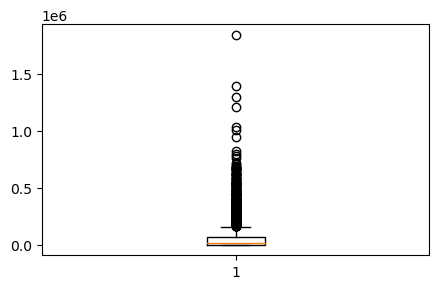

'\n\nThe outliers should be retained since the number of votes from a view could be multiple on \naccount of every impression they have on the movie.\n\n'

In [68]:
fig = plt.figure(figsize =(5, 3))
 
# Creating plot
plt.boxplot(combined_df.numvotes)
 
# show plot
plt.show()

"""

The outliers should be retained since the number of votes from a view could be multiple on 
account of every impression they have on the movie.

"""

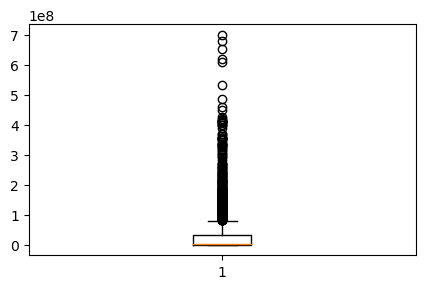

'\n\nThe outliers should be retained the domestic gross could be equated as the cost used\nin the production some productions could be heavily invested targeting\nto get the best out of its airing/production or depending on the cast involved or creation of scenes\n\n'

In [69]:
fig = plt.figure(figsize =(5, 3))
 
# Creating plot
plt.boxplot(combined_df.domestic_gross)
 
# show plot
plt.show()

"""

The outliers should be retained the domestic gross could be equated as the cost used
in the production some productions could be heavily invested targeting
to get the best out of its airing/production or depending on the cast involved or creation of scenes

"""

 All outliers in the dataframe will be retained .

**Genre Seperation**

In [91]:
#Chceking the number of unique genres in the dataframe
len(combined_df['genres'].unique())

319

In [95]:
#seperating the genres and creating columns on each with a count 1 if listed on that entry and 0 if not listed.
s = combined_df['genres'].str.split(',').explode()
encoder = OneHotEncoder()
encoded = encoder.fit_transform(s.values[:, None])
genres_df = pd.DataFrame(encoded.toarray(), columns=np.ravel(encoder.categories_), dtype='int',) \
                .groupby(s.index) \
                .sum()

In [129]:
#Displaying the first 10 
genres_df.head(10)

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
8,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
10,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# tpe of created dataframe where genres are stored
type(genres_df)

pandas.core.frame.DataFrame

In [89]:
# The dataset contains 2997 instances and 22 variables
genres_df.shape

(2997, 22)

In [93]:
# Combining the columns created with the combined dataframe.
combined_dff = pd.concat([combined_df, genres_df], axis=1)
combined_dff

#There are 22 more added columns which indicate there are 22 individual genres 

,title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,year,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,The Legend of Hercules,The Legend of Hercules,2014-01-01,99.0,"Action,Adventure,Fantasy",4.2,50352,LG/S,18800000.0,2014-01-01,...,0,0,0,0,0,0,0,0,0,0
1,Baggage Claim,Baggage Claim,2013-01-01,96.0,Comedy,5.1,8296,FoxS,21600000.0,2013-01-01,...,0,0,0,0,0,0,0,0,0,0
3,Moneyball,Moneyball,2011-01-01,133.0,"Biography,Drama,Sport",7.6,326657,Sony,75600000.0,2011-01-01,...,0,0,0,0,0,0,1,0,0,0
4,Hereafter,Hereafter,2010-01-01,129.0,"Drama,Fantasy,Romance",6.5,87288,WB,32700000.0,2010-01-01,...,0,0,0,0,1,0,0,0,0,0
5,Mission: Impossible - Ghost Protocol,Mission: Impossible - Ghost Protocol,2011-01-01,132.0,"Action,Adventure,Thriller",7.4,428142,Par.,209400000.0,2011-01-01,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,The Dead Lands,The Dead Lands,2014-01-01,107.0,"Action,Adventure",6.3,4185,Magn.,5200.0,2015-01-01,...,0,0,0,0,0,0,0,0,0,0
3023,The Wave,Bølgen,2015-01-01,105.0,"Action,Drama,Thriller",6.7,28167,Magn.,177000.0,2016-01-01,...,0,0,0,0,0,0,0,1,0,0
3024,Hitchcock/Truffaut,Hitchcock/Truffaut,2015-01-01,79.0,Documentary,7.4,4977,Cohen,260000.0,2015-01-01,...,0,0,0,0,0,0,0,0,0,0
3025,Boy Erased,Boy Erased,2018-01-01,115.0,"Biography,Drama",7.0,18768,Focus,6800000.0,2018-01-01,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# Saving the cleaned data into a csv file
combined_dff.to_csv('combined_dff.csv',index=False)

In [73]:
# Veryfing storage of data by reading the file
combined_dff = pd.read_csv('combined_dff.csv')

In [74]:
combined_dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997 entries, 0 to 2996
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2997 non-null   object 
 1   original_title   2997 non-null   object 
 2   start_year       2997 non-null   object 
 3   runtime_minutes  2997 non-null   float64
 4   genres           2997 non-null   object 
 5   averagerating    2997 non-null   float64
 6   numvotes         2997 non-null   int64  
 7   studio           2997 non-null   object 
 8   domestic_gross   2997 non-null   float64
 9   year             2997 non-null   object 
 10  Action           2997 non-null   int64  
 11  Adventure        2997 non-null   int64  
 12  Animation        2997 non-null   int64  
 13  Biography        2997 non-null   int64  
 14  Comedy           2997 non-null   int64  
 15  Crime            2997 non-null   int64  
 16  Documentary      2997 non-null   int64  
 17  Drama         

### *Data Exploration*

-What are some of the most common studios (Competitors) to narrow down what there advantage over others are ?

-What are the top popular genres ?

-Does the number of votes and ratings correlate ?

-Does the domestic gross(budget) affect the ratings ?

-What are the correlations of diffrent genres and other attributes ?

**Top Studios Producing**

In [75]:
#counting the occurence of each studio mention in the dataframe
combined_dff.studio.value_counts()

#creating a dictonary to hold the count values
studio_count = combined_dff['studio'].value_counts().to_dict()
studio_count


{'Uni.': 155,
 'IFC': 145,
 'Fox': 137,
 'WB': 118,
 'Magn.': 116,
 'SPC': 110,
 'BV': 97,
 'Par.': 90,
 'LGF': 90,
 'Sony': 87,
 'Wein.': 81,
 'FoxS': 77,
 'Eros': 76,
 'RAtt.': 68,
 'Focus': 62,
 'Strand': 54,
 'KL': 53,
 'WB (NL)': 53,
 'WGUSA': 49,
 'MBox': 48,
 'UTV': 47,
 'A24': 45,
 'CJ': 44,
 'CL': 43,
 'ORF': 39,
 'FM': 39,
 'LG/S': 37,
 'Cohen': 36,
 'Rela.': 31,
 'SGem': 31,
 'STX': 23,
 'TriS': 22,
 'Osci.': 22,
 'Drft.': 21,
 'BG': 21,
 'EOne': 21,
 'Gold.': 20,
 'BST': 20,
 'MNE': 20,
 'FIP': 19,
 'RTWC': 19,
 'Sum.': 18,
 'GK': 17,
 'Zeit.': 16,
 'Relbig.': 16,
 'Trib.': 16,
 'Orch.': 14,
 'VE': 14,
 'Anch.': 13,
 'CBS': 13,
 'CGld': 13,
 'Yash': 13,
 'FCW': 11,
 'FUN': 10,
 'FD': 10,
 'W/Dim.': 10,
 'FR': 10,
 'Vari.': 10,
 'P/DW': 10,
 'Distrib.': 9,
 'FRun': 8,
 'ENTMP': 8,
 'Free': 8,
 'BH Tilt': 7,
 'AF': 7,
 'Mont.': 7,
 'Annapurna': 7,
 'LGP': 7,
 'Abr.': 7,
 'Scre.': 7,
 'Jan.': 6,
 'Cdgm.': 6,
 'NGE': 6,
 'Vita.': 6,
 'Over.': 6,
 'PFR': 6,
 'ATO': 5,
 'LD': 5,


In [76]:
# Confirming the data type of studio_count
type(studio_count)

dict

In [77]:
# Assesing the lengthof the dictonary
len(studio_count)

215

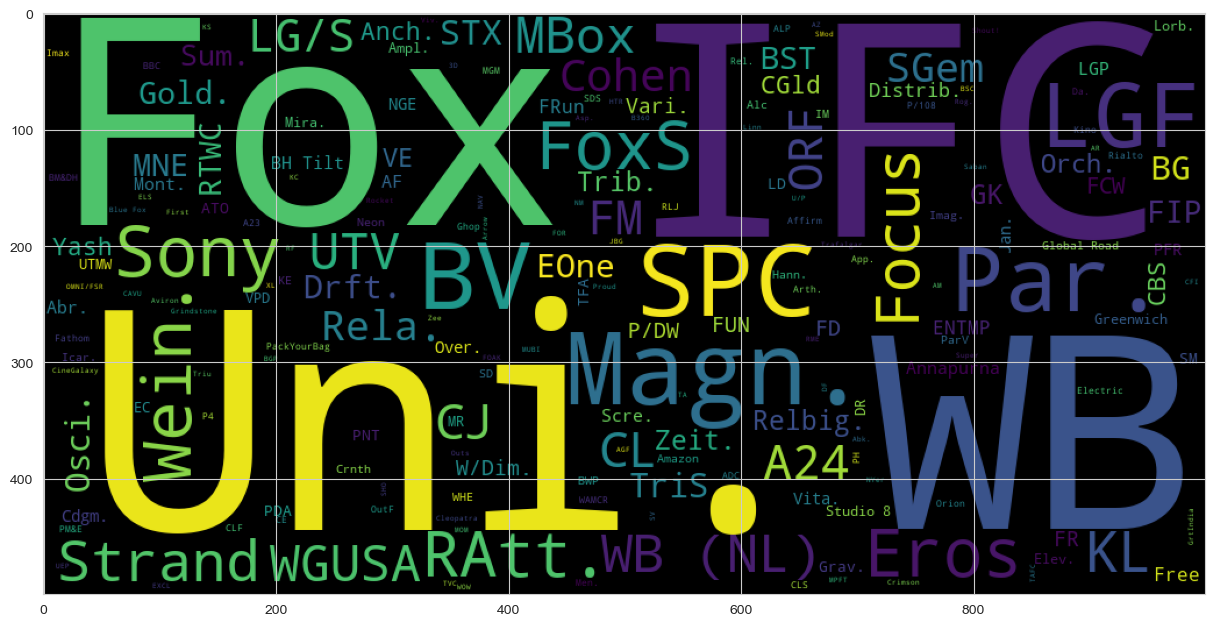

In [87]:
# Creating a wordcloud
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(studio_count)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

The size of the font is proportional to the number of times a studio appears in the dataset.From the wordcloud some of the most common studios include;Fox, Uni, WB, IFC.On the kind of studio to be used shortlisting these 4 should be studied at what they do differently/quality to top the list.

In [119]:
#Sorting the studio count dictonary values by descending 
sorted_studio_count = sorted(studio_count.items(), key=lambda x:x[1], reverse=True)
sorted_studio_count

[('Uni.', 155),
 ('IFC', 145),
 ('Fox', 137),
 ('WB', 118),
 ('Magn.', 116),
 ('SPC', 110),
 ('BV', 97),
 ('Par.', 90),
 ('LGF', 90),
 ('Sony', 87),
 ('Wein.', 81),
 ('FoxS', 77),
 ('Eros', 76),
 ('RAtt.', 68),
 ('Focus', 62),
 ('Strand', 54),
 ('KL', 53),
 ('WB (NL)', 53),
 ('WGUSA', 49),
 ('MBox', 48),
 ('UTV', 47),
 ('A24', 45),
 ('CJ', 44),
 ('CL', 43),
 ('ORF', 39),
 ('FM', 39),
 ('LG/S', 37),
 ('Cohen', 36),
 ('Rela.', 31),
 ('SGem', 31),
 ('STX', 23),
 ('TriS', 22),
 ('Osci.', 22),
 ('Drft.', 21),
 ('BG', 21),
 ('EOne', 21),
 ('Gold.', 20),
 ('BST', 20),
 ('MNE', 20),
 ('FIP', 19),
 ('RTWC', 19),
 ('Sum.', 18),
 ('GK', 17),
 ('Zeit.', 16),
 ('Relbig.', 16),
 ('Trib.', 16),
 ('Orch.', 14),
 ('VE', 14),
 ('Anch.', 13),
 ('CBS', 13),
 ('CGld', 13),
 ('Yash', 13),
 ('FCW', 11),
 ('FUN', 10),
 ('FD', 10),
 ('W/Dim.', 10),
 ('FR', 10),
 ('Vari.', 10),
 ('P/DW', 10),
 ('Distrib.', 9),
 ('FRun', 8),
 ('ENTMP', 8),
 ('Free', 8),
 ('BH Tilt', 7),
 ('AF', 7),
 ('Mont.', 7),
 ('Annapurna', 

In [120]:
type(sorted_studio_count)

list

In [117]:
#Slicinf the list to get top 15
Top15 = sorted_studio_count[0:16]
Top15

[('Uni.', 155),
 ('IFC', 145),
 ('Fox', 137),
 ('WB', 118),
 ('Magn.', 116),
 ('SPC', 110),
 ('BV', 97),
 ('Par.', 90),
 ('LGF', 90),
 ('Sony', 87),
 ('Wein.', 81),
 ('FoxS', 77),
 ('Eros', 76),
 ('RAtt.', 68),
 ('Focus', 62),
 ('Strand', 54)]

Text(0, 0.5, 'Studio')

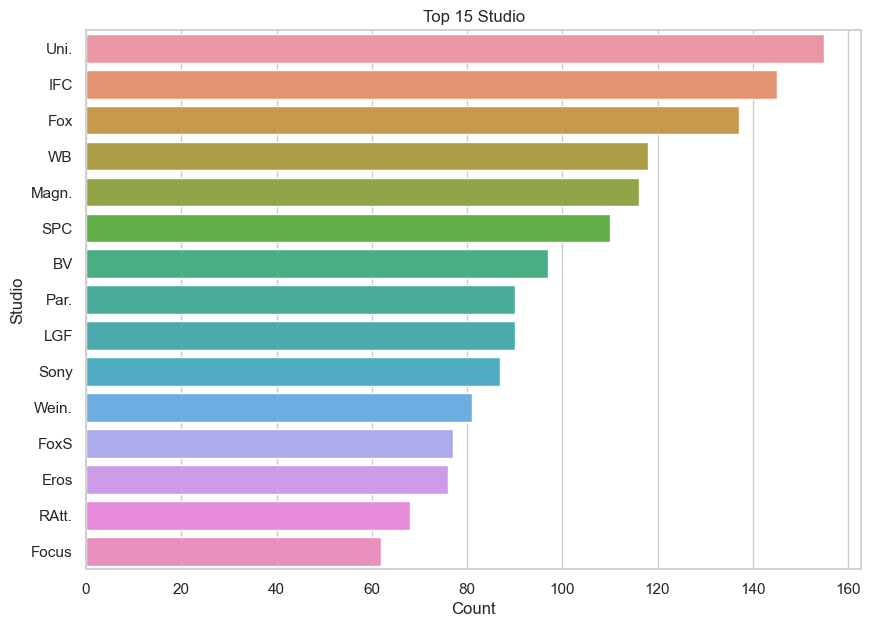

In [128]:
# Ploting the top 15 studios
plt.figure(figsize=(10,7))
g = sb.countplot(y = combined_dff['studio'], order=combined_dff['studio'].value_counts().index[:15])
plt.title("Top 15 Studio")
plt.xlabel("Count")
plt.ylabel("Studio")

To get a broader information range from top studios the top studios list was increased to 15 with a clear indication of number of counts mentioned with the least in top15 having a count of about 62.

**Top Produced Genres**

In [132]:
#Calculating the sum of each genre column
Total_perGenre = genres_df.sum()
Total_perGenre

Action          640
Adventure       437
Animation       151
Biography       285
Comedy          923
Crime           378
Documentary     223
Drama          1744
Family          116
Fantasy         169
History         134
Horror          235
Music            90
Musical          18
Mystery         205
News              4
Romance         468
Sci-Fi          134
Sport            53
Thriller        446
War              51
Western          21
dtype: int64

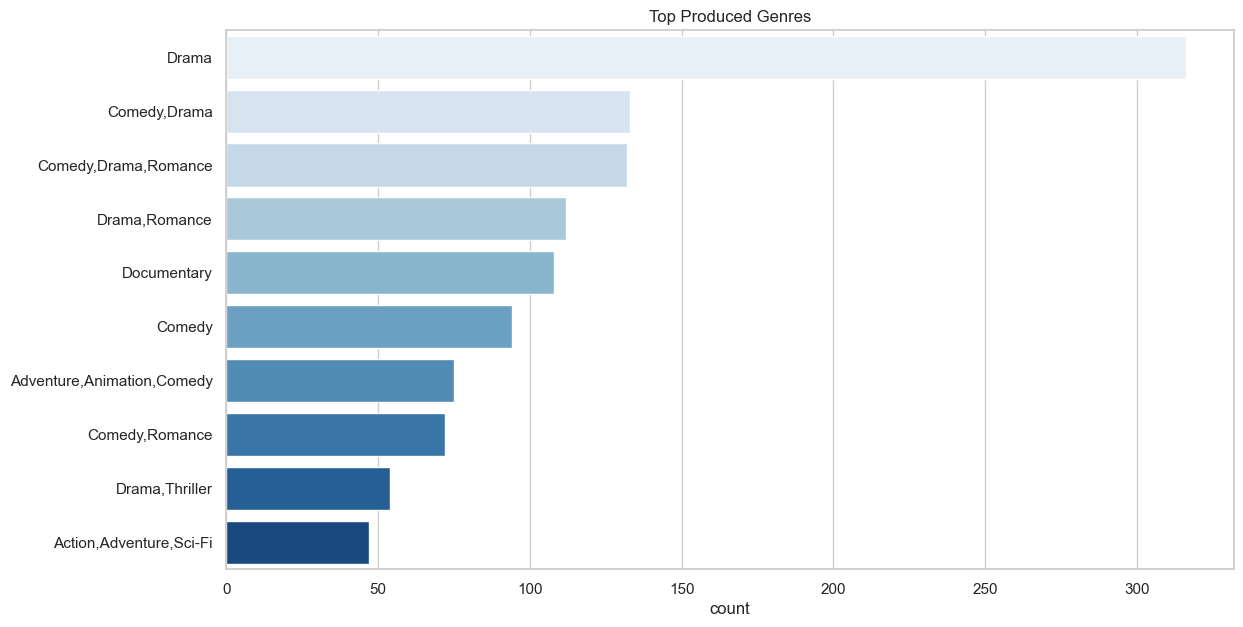

In [151]:
#Plotting the top produced genres from the dataframe based on the title of the movie,ordering and limiting to top10
Seperated_Genres = combined_dff[combined_dff.genres != 'Notlisted'].set_index('title').genres.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top Produced Genres')
sb.countplot(y = Seperated_Genres, order=Seperated_Genres.value_counts().index[:10], palette='Blues')
plt.show()

In order to produce what already has a ready market there is need to understand what genres are most common,from the above plot Drama tops the list individuals and also has several appearances as a combination of other genres.

**Ratings vs Num of votes**

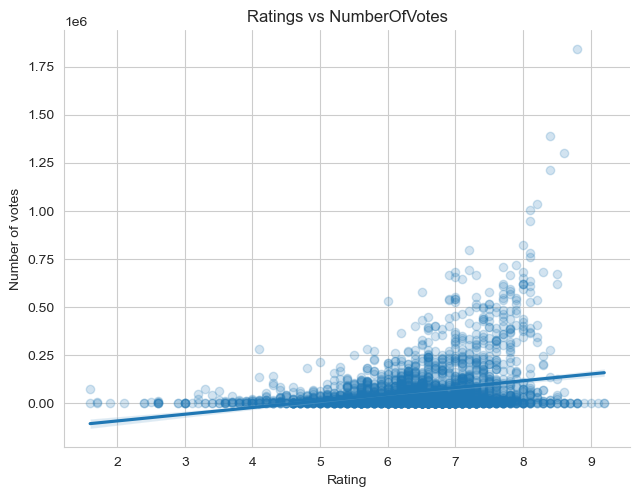

In [81]:
# Plot scatterplot of ratings vs number of votes
sb.lmplot(x="averagerating", 
           y="numvotes", 
           data= combined_dff,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Ratings vs NumberOfVotes')
plt.xlabel('Rating')
plt.ylabel('Number of votes');

In [155]:
# correlation 
cor1 =combined_df[["averagerating","numvotes"]].corr(method ='pearson')
print (cor1)

               averagerating  numvotes
averagerating       1.000000  0.279302
numvotes            0.279302  1.000000


The rating and number of votes are in any way related meaning the ratings of a movie increase or decrease depending on the number of votes cast.

A campaign to increase engagement of viewers should be conducted to ensure they give their feedback through rating the movies or polls to be able to know their target audiences expectations.

**Ratings vs Budget(Domestic_Gross)**

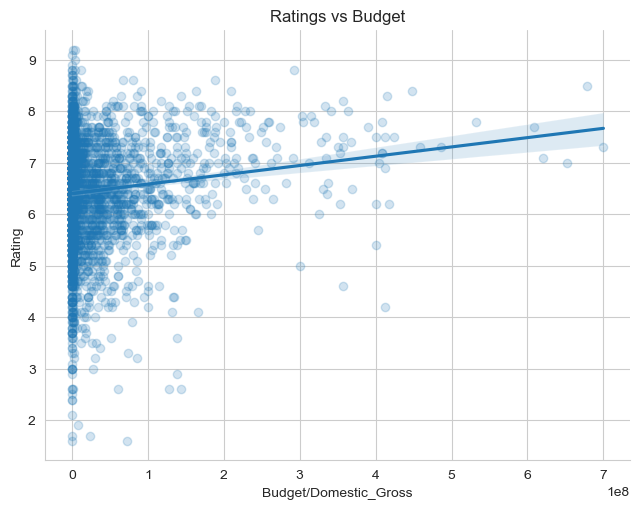

In [82]:
# Plot scatterplot of retweet vs favorite count
sb.lmplot(x="domestic_gross", 
           y="averagerating", 
           data= combined_dff,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5})
plt.title('Ratings vs Budget')
plt.xlabel('Budget/Domestic_Gross')
plt.ylabel('Rating');

In [154]:
# correlation 
cor1 =combined_df[["averagerating","domestic_gross"]].corr(method ='pearson')
print (cor1)

                averagerating  domestic_gross
averagerating        1.000000        0.119419
domestic_gross       0.119419        1.000000


The is a positive correlation between domestic_gross and the rating of a movie though its weak 0.12(rounded) meaning the investemnt put in the production of a movie has a proportion to the ratings.

**Correlations**

In [107]:
#Checking the correlation of genre and domestic gross which could affect the type of genre to be produced
combined_dff[combined_dff.columns[1:]].corr()['domestic_gross'][:].sort_values(ascending=False).to_frame()

#df[df.columns[1:]].corr()['median_house_value'][:].sort_values(ascending=False).to_frame()

,domestic_gross
domestic_gross,1.000000
numvotes,0.665154
Adventure,0.401151
Sci-Fi,0.262430
Action,0.225160
Animation,0.199883
runtime_minutes,0.127019
averagerating,0.119419
Fantasy,0.084762
Family,0.050638


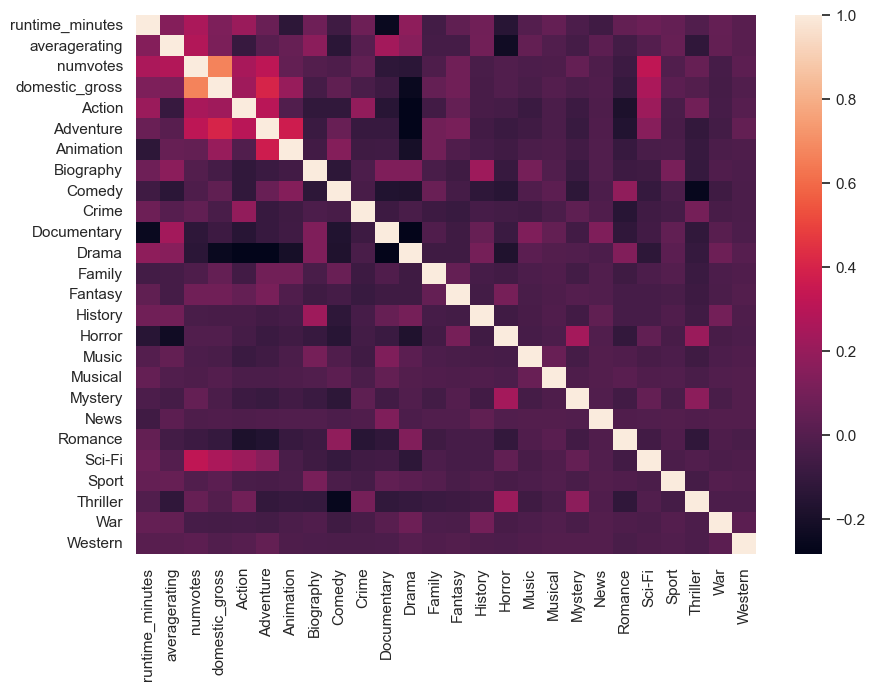

In [109]:
# Creating a correlation heatmap 
plt.figure(figsize=(10,7))
sb.set_theme(style="white")
corr = combined_dff.corr()
heatmap = sb.heatmap(corr, annot=False, fmt='.1g')

The light shades show high correlation betwen the elements while dark shades show low correlation between the elements.Eg the Genre Adventure has a very strong positive correlation with domestic_gross meaning a high investment will be used in its production.

Combination of genres also matters e.g Genre Adventure and Animation have a strong correlation while Comedy and Thriller have a weak correlation.

### *Conclusion*

We have drawn many interesting inferences from the dataset Netflix titles; here's a summary of the few of them:

The most genre type is drama with the least as news,

The most popular studio is Uni followed closely with IFC,

The amount of Domestic Gross does affect the rating of the movie,

Some Genre Combinations are more relatable to each other unlike others,

The number of votes does affect the rating of a movie.

### *Recommendations*

The studios that should be invested in should be either Fox, Uni, WB or IFC

The company should consider starting with the production of drama genre movies.

A team to engage with the viewers should be put in oder to engage with them by creating polls to get their views and understand their target audience well enough.